In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/AKANKSHA/Downloads/advertising.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


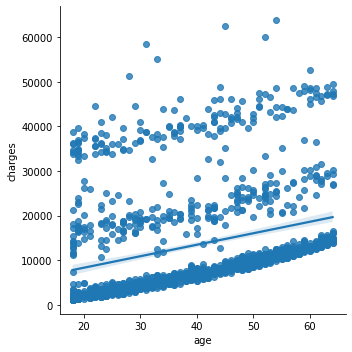

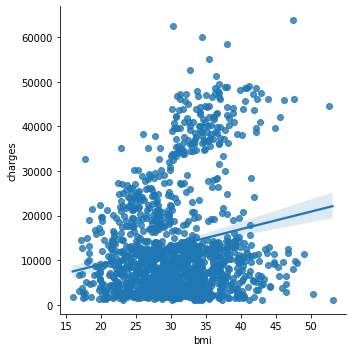

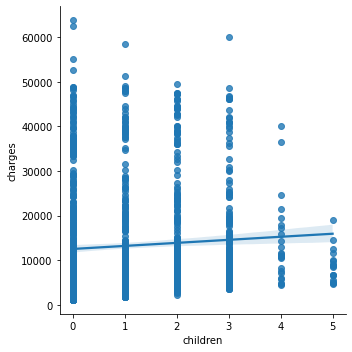

In [7]:
features=["age","bmi","children"]
for feature in features:
    sns.lmplot(x=feature,y="charges",scatter=True,data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

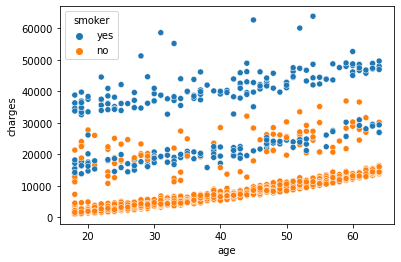

In [8]:
sns.scatterplot(x="age",y="charges",hue="smoker",data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

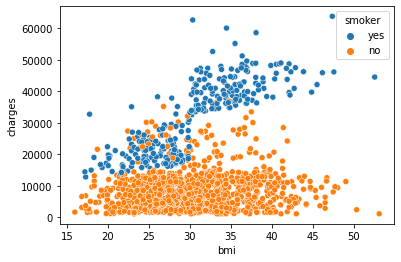

In [9]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

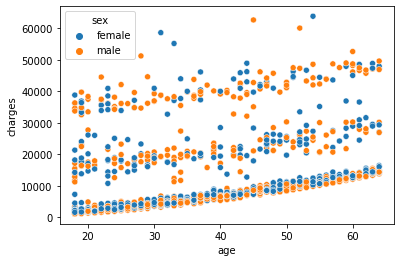

In [10]:
sns.scatterplot(x="age",y="charges",hue="sex",data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

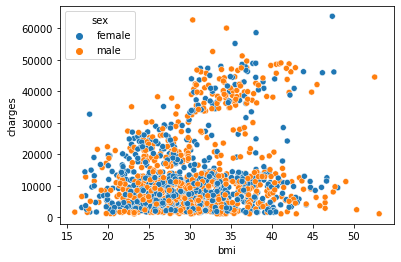

In [11]:
sns.scatterplot(x="bmi",y="charges",hue="sex",data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

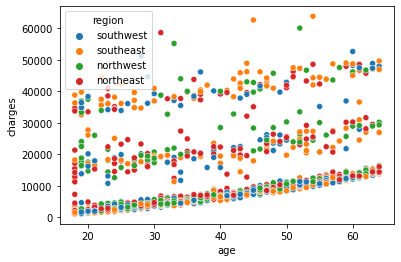

In [12]:
sns.scatterplot(x="age",y="charges",hue="region",data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

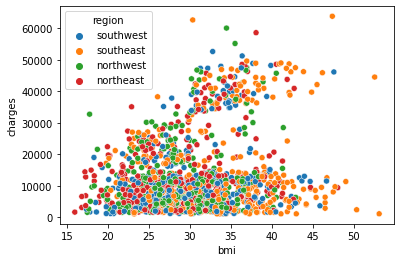

In [13]:
sns.scatterplot(x="bmi",y="charges",hue="region",data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

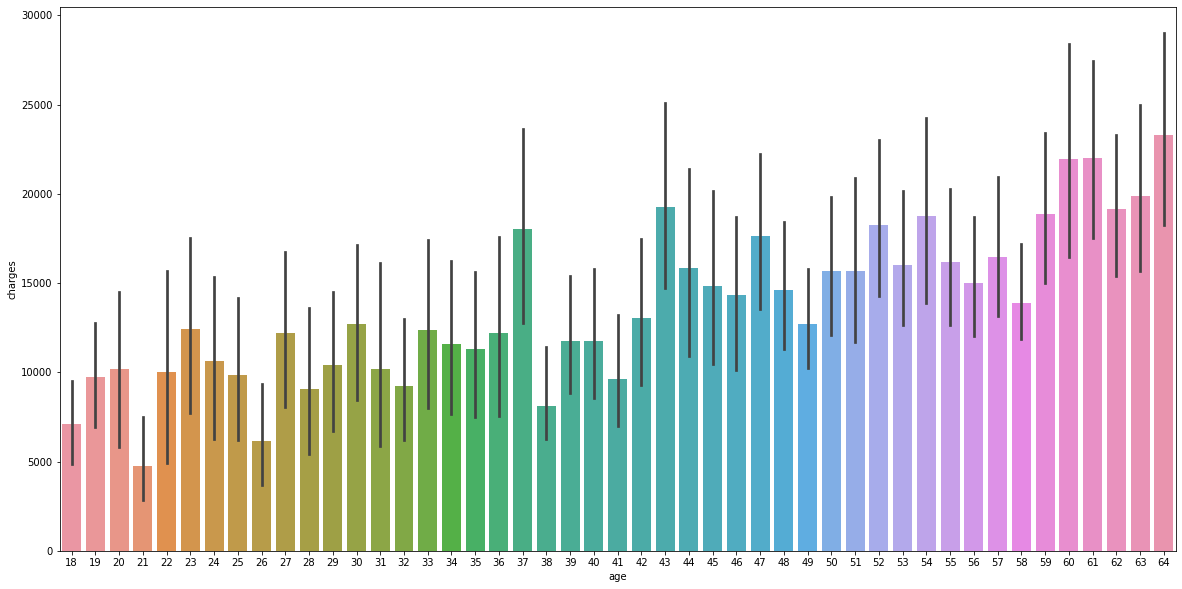

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x="age",y="charges",data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

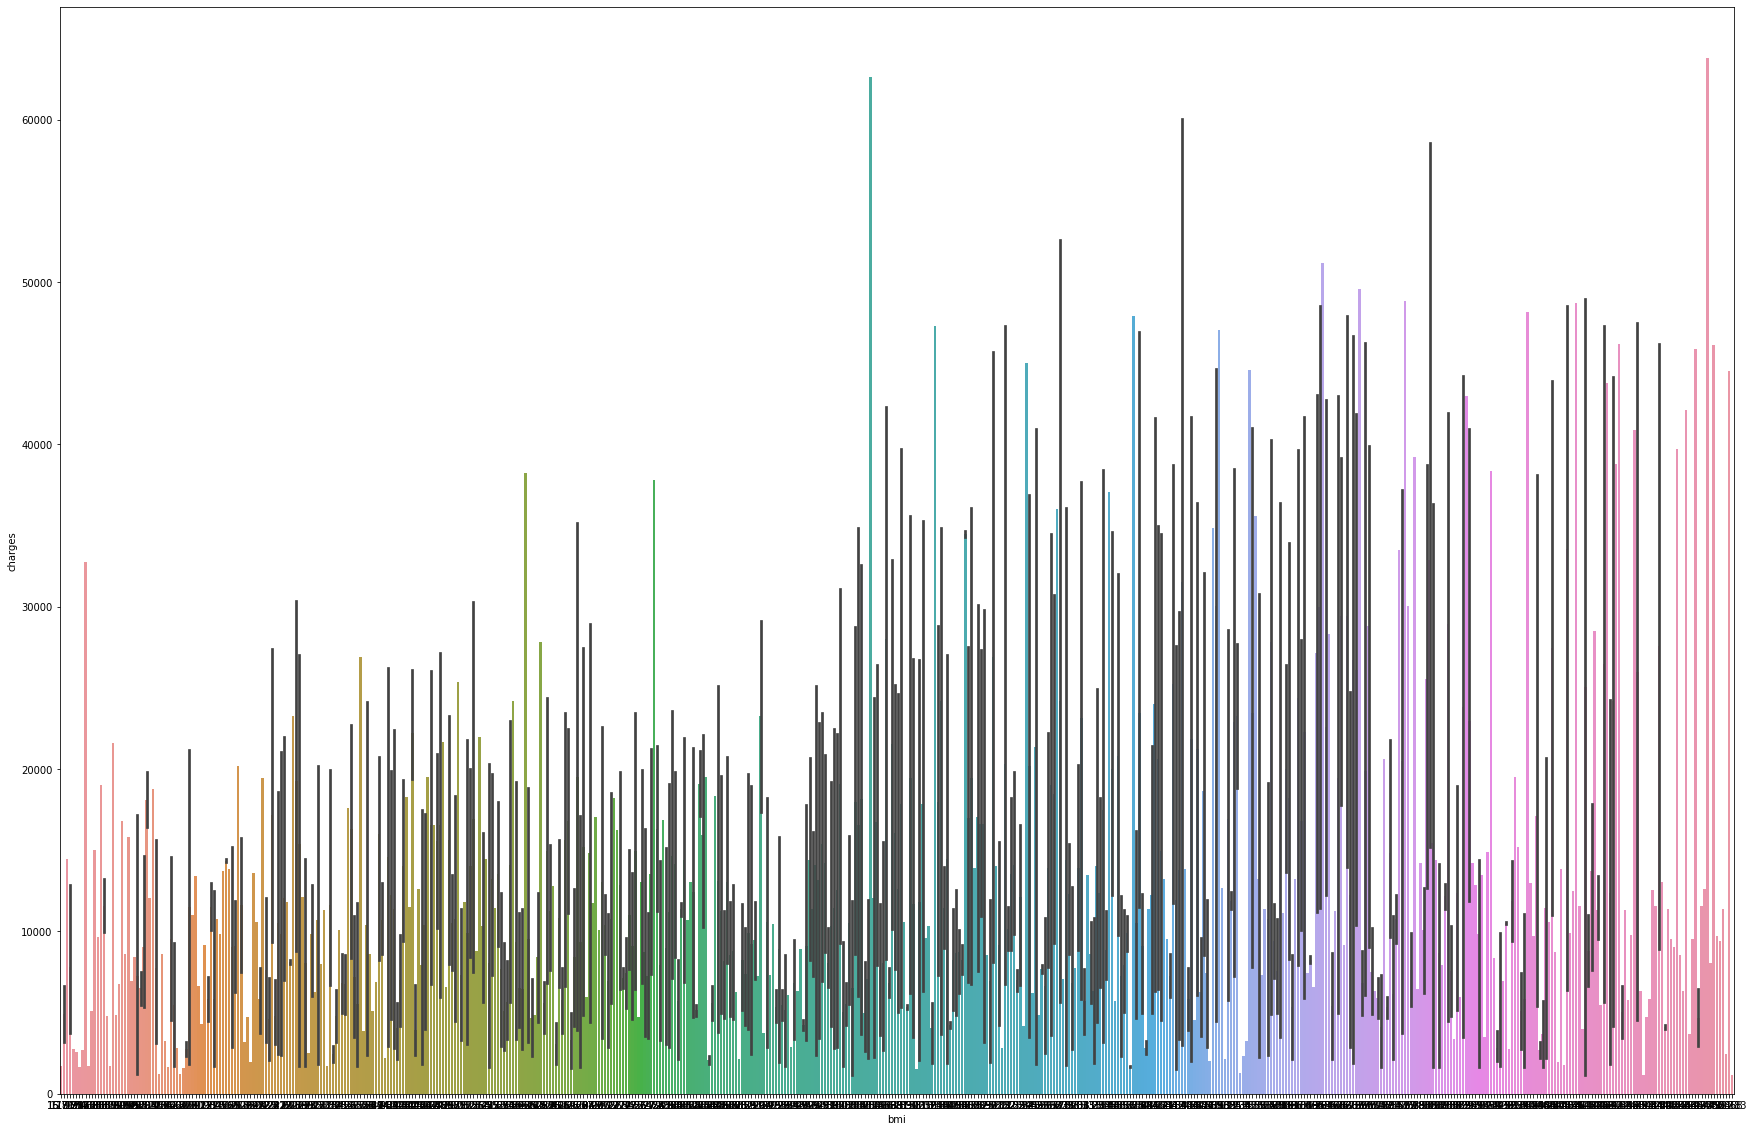

In [37]:
plt.figure(figsize=(30,20))
sns.barplot(x="bmi",y="charges",data=df)

In [15]:
df = pd.get_dummies(data=df, columns=['smoker','sex'], drop_first=True)

In [16]:
df.head()

,age,bmi,children,region,charges,smoker_yes,sex_male
0,19,27.900,0,southwest,16884.92400,1,0
1,18,33.770,1,southeast,1725.55230,0,1
2,28,33.000,3,southeast,4449.46200,0,1
3,33,22.705,0,northwest,21984.47061,0,1
4,32,28.880,0,northwest,3866.85520,0,1


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x= df[["bmi","age","smoker_yes"]]
y=df["charges"]

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25,random_state=111)

In [63]:
len(x_train)

1003

In [64]:
clf= LinearRegression()

In [65]:
clf.fit(x_train,y_train)

LinearRegression()

In [66]:
clf.predict(x_test)

array([27529.68940205, 32481.28218336,  8047.96645885, 14901.67874102,
       13360.49498642, 14734.37963249,  6831.46207763, 27580.21878884,
       10110.85679755, 25259.08841387,  6329.08444572, 16066.92055388,
        7756.88905156, 14783.83469116,  7436.87358143, 15632.02815833,
       10171.75690544,  5449.43766869,  1005.64803299, 11324.53619872,
       33526.2215571 ,  8575.77786511, 14745.82468171, 12330.92839895,
        9698.03603224,  5099.04321681,   918.26825151,  4749.58094865,
       13851.22856695, 31198.73348469, 15207.73391491,  9265.15014852,
       13265.541035  , 25885.15905789, 33843.66492245,  1717.09194665,
        7987.03792208,  6740.09770135,  9887.20776886, 32711.93978905,
       27732.42641526,  9501.31855455,  1517.88765083,  3097.95674084,
       13541.7543912 , 27952.06242027,  3823.44623738, 26205.25981466,
       11757.39365356, 33414.79206241,  5482.98277703, 11753.38062988,
       27639.14081378,  6848.21892504, 33921.63459542, 34717.46273724,
      

In [67]:
y_test

1000    17361.76610
53      37742.57570
432      5969.72300
162     10450.55200
1020     8798.59300
           ...     
397     16586.49771
1005     4433.38770
210      1980.07000
635     14410.93210
1079    15161.53440
Name: charges, Length: 335, dtype: float64

In [68]:
clf.score(x_test,y_test)

0.7927053470876216

In [69]:
predictions = clf.predict(x_test)

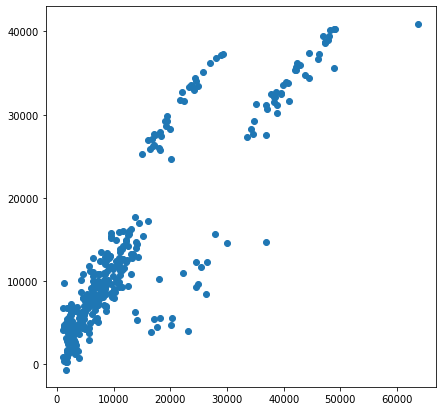

In [70]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,predictions)

C:\Users\AKANKSHA\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

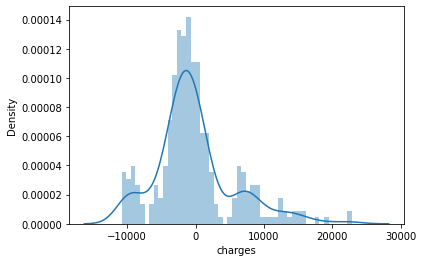

In [71]:
sns.distplot((y_test-predictions),bins=50)

In [72]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

RMSE: 5788.458445934205
MAE: 4121.511080130205
MSE: 33506251.180307034


In [73]:
import pickle

In [76]:
with open('clf_pkl', 'wb') as files:
    pickle.dump(clf, files)

In [77]:
with open('clf_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [78]:
lr.predict(x[0:1])

array([26205.25981466])